# Bin Packing Lab

- Authors:
  - Jinal Kasturiarachchi, kasturij@mcmaster.ca
  - Maged Armanios, armanm5@mcmaster.ca
- Group ID on Avenue: binpack 32
- Gitlab URL: https://gitlab.cas.mcmaster.ca/kasturij/l2-bin-packing

## T1

### Explanation of how the code follows SOLID Principles

S: The single responsibility principle states that each class should only have one purpose. The sample code provided included four classes, these classes are BinPPReader, NextFit_ON, NextFit_Off, and BenMaier. Additionally there are other interfaces and abstract classes. Amongst the four, they only have one specific responsibility. BinPP is used to read data in the BinPP format, BenMaier solves the Binpacking problem using the BenmMaire algorithm, and the nextfit classes solve the problem using the nextfit algorithm (either offline or online).

O: The open closed principle states that objects or entities should be open for extension but closed for modification. In addition the the classes provided, the code includes a set of abstract classes. These include Online, Offline, and DatasetReader. These classes contain abstract methods that allow us to implement different algorithms/readers. Such as creating a specific data set reader to read the BinPP format without having to modify and existing code (Dataset reader) or implmenenting a new offline algorithm without having to modify current code (Abstract Class Offline)

L: Liskov's substitution principle states that properties on objects of a certain type T hold for objects of type S which are substypes of T. As of now we don't have any subclasses, rather we have implementations of abstract classes so we will forget about Liskov's rule for now

I: Interface segregation states that no code should be forced to depend on methods it does not use. The given code follows this principle by implementing abstract methods which are changed depending on the use case of the class. Such as \_load_data_from_disk() and \_process()

D: Dependancy Inversion has two components. 
1. High-level modules should not import anything from low-level modules; they should both depend on abstractions
2. Abstractions should not depend on concrete implementations; concrete implementations should depend on abstractions

The starting code does not violate either of these two rules. Online, offline, and Dataset reader do not depend on any concretions while BinppReader, BenMaier, Nextfit_off/On rely on abstract classes only and feature no imports from low level modules.

### Dimensions of the dataset

For the data, there are three parameters to take into account.
1. The amount of items 
2. The weights of each item
3. The bin capacity
These parameters are important because adjusting them can help us model real world problems. For example, in an amazon warehouse they may receive many items of small weights and have medium bin capacities. By using the datasets with these characteristics we can find the best algorithm for this scenario. 

### Worst Possible Solution
The worst possible solution would be to provide every item with its own bin. In general, it returns N bins of size i where i is in the set of weights

In [1]:
from macpacking.reader import BinppReader, DatasetReader
from macpacking.model import Offline, Online
import macpacking.algorithms.online as online
import macpacking.algorithms.offline as offline

dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
strategy: Online = online.WorstSolution()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 50
[[8], [8], [12], [13], [13], [14], [15], [17], [18], [19], [20], [23], [30], [37], [37], [39], [40], [43], [43], [44], [44], [50], [51], [61], [61], [62], [62], [63], [66], [67], [69], [70], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


## T2

## Demonstration of Various Algorithms

In [2]:
strategy: Online = online.FirstFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 44], [44, 43, 13], [50, 43], [51, 39], [61, 13, 20], [61, 37], [62, 23, 15], [62, 37], [63], [66, 30], [67], [69, 8, 18], [70], [71], [72, 14, 12], [75], [76], [76], [79, 19], [83], [83, 17], [88, 8], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


In [3]:
strategy: Online = online.BestFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 44, 12], [44, 43, 13], [50, 43], [51], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67, 30], [69, 17, 14], [70, 18, 8], [71], [72, 23], [75], [76], [76, 19], [79, 20], [83, 13], [83, 15], [88, 8], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


In [4]:
strategy: Online = online.WorstFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 33
[[37, 43], [39, 19], [40, 8, 18, 13], [44, 43], [44, 50], [51, 30], [61, 13], [61, 20], [62, 23], [62, 37], [63, 17], [66, 15], [67, 14], [69, 8], [70, 12], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


In [5]:
strategy: Offline = offline.FirstFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}') 

nb_bins = 31
[[40], [43, 43], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71, 13], [72, 14, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


In [6]:
strategy: Offline = offline.BestFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43, 14], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71], [72, 13, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


In [7]:
strategy: Offline = offline.WorstFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 39, 8], [43, 43], [50, 44], [51, 44], [61, 37], [61, 37], [62, 23], [62, 30], [63, 20], [66, 19], [67, 18], [69, 17], [70, 15], [71, 14], [72, 13], [75, 13], [76, 8], [76, 12], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


### Analysis of the algorithms - N1C3W2

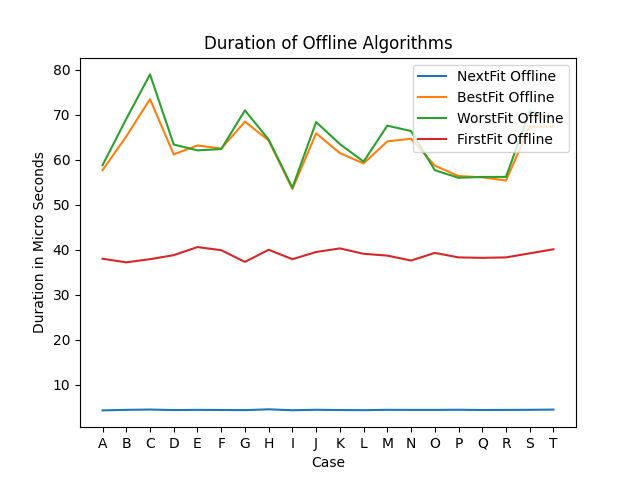

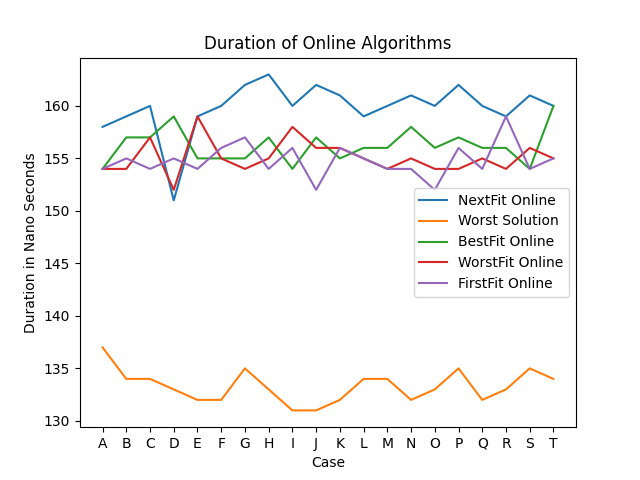

Note: Error bars omitted because they clutter the graph and make it too hard to read. To see error bars, go to ./analysis_tools/bench_grapher.py and uncomment the block comments containing "plt.errorbar(...

In terms of runetime, the offline algorithms all take significantly longer than their online counterparts. This is most likely due to the offline algorithms sorting the data before running the same algorithm as their online counterpart. 

Amongst the online algorithms, the worst solution takes the least amount of time. Averaging ~15 ns less than other algoritms. We suspect this is due to it not having any actual logic in its design, reducing runtime.

For the offline algorithms, nextFitOff takes drastically less time than all the other algorithms. We are unsure as to why this is the case as its online counterpart is argueably the slowest online algorithm. Perhaps the combination of a sorted dataset and the algorithm allow it to run at its fastest. Bestfit and Worstfit almost take the same amount of time. This is most likely due to them having the same logic with the only difference is one keeps track of the most full bin and the other the least full bin.

Benchmarking these algorithms in terms of runtime is relvant and important because some applications of the BinPP problem require quick computations. For example, a group of servers distributing network traffic could be seen as an online Multiway Partitioning problem (which can be implemented with a binPP algorithm). If the algorithm were to take too long, traffic would come in faster than it can compute which server to use, leading to increasing load times for users.

## T3

### Solution Reader

In [8]:
from macpacking.reader import SolutionReader

In [9]:
fileList = ['./_datasets/binpp/N4C2W2/N4C2W2_A.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_B.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_C.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_D.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_E.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_F.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_G.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_H.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_I.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_J.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_K.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_L.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_M.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_N.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_O.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_P.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_Q.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_R.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_S.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_T.BPP.txt']
solutionFile = './_datasets/solutions/binpp.csv'
reader = SolutionReader(fileList, solutionFile)
result = reader.readSolutions()
print(result)

[253, 254, 249, 258, 257, 272, 252, 255, 262, 256, 259, 263, 261, 264, 253, 266, 257, 256, 273, 256]


### Improvement Margins

In [10]:
from analysis_tools.improvement_margin import run_analyze_correctness, list_case_files
from macpacking.algorithms.offline import NextFitOff as NFOff, WorstFitOff as WFOff, BestFitOff as BFOff, FirstFitOff as FFOff
from macpacking.algorithms.online import NextFitOn as NFOn, WorstSolution as WS, WorstFitOn as WFOn, BestFitOn as BFOn, FirstFitOn as FFOn
from macpacking.algorithms.baseline import BenMaier
import matplotlib.pyplot as plt


In [11]:
CASESFifty = './_datasets/binpp/N1C2W2'
CASESHundred = './_datasets/binpp/N2C2W2'
CASESTwohundred = './_datasets/binpp/N3C2W2'
CASESFivehundred = './_datasets/binpp/N4C2W2'
OFFLINE_STRATEGIES = [
    NFOff, WFOff, BFOff, FFOff, BenMaier
]

ONLINE_STRATEGIES = [
    NFOn, WS, WFOn, BFOn, FFOn
]

casesFifty = list_case_files(CASESFifty)
casesHundred = list_case_files(CASESHundred)
casesTwohundred = list_case_files(CASESTwohundred)
casesFivehundred = list_case_files(CASESFivehundred)

[avg_excess_fifty, correct_percentage_fifty] = run_analyze_correctness(casesFifty, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
[avg_excess_hundred, correct_percentage_hundred] = run_analyze_correctness(casesHundred, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
[avg_excess_twohundred, correct_percentage_twohundred] = run_analyze_correctness(casesTwohundred, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
[avg_excess_fivehundred, correct_percentage_fivehundred] = run_analyze_correctness(casesFivehundred, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
# for funcName in avg_excess:
#     print(f'{funcName} mean excess {avg_excess[funcName]}')
#     print(f'{funcName} Correct % = {correct_percentage[funcName]}')
#     print()

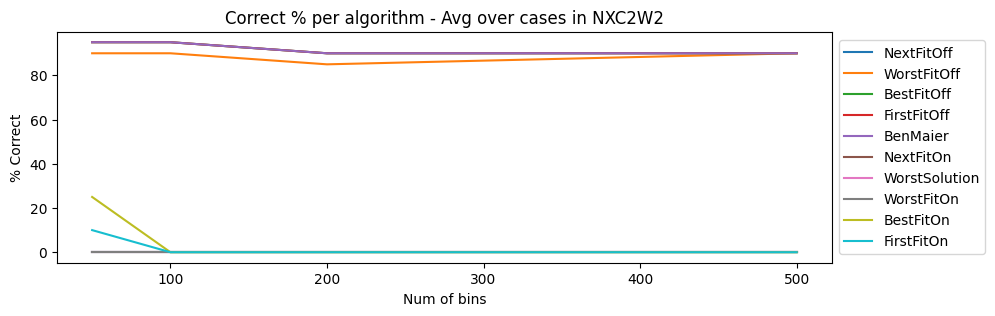

In [12]:
plt.figure(figsize=(10,3))

for i in correct_percentage_fifty:
    plt.plot([50,100,200,500],[correct_percentage_fifty[i],correct_percentage_hundred[i],correct_percentage_twohundred[i],correct_percentage_fivehundred[i]], label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('% Correct')
plt.title('Correct % per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

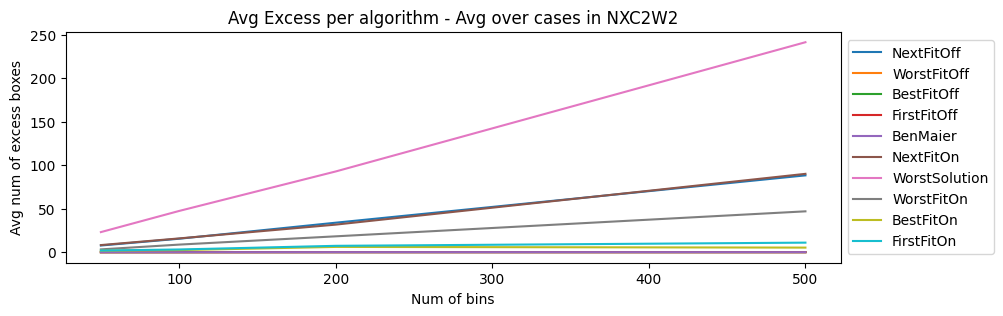

In [13]:
plt.figure(figsize=(10,3))

for i in avg_excess_fifty:
    plt.plot([50,100,200,500],[avg_excess_fifty[i],avg_excess_hundred[i],avg_excess_twohundred[i],avg_excess_fivehundred[i]], label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('Avg num of excess boxes')
plt.title('Avg Excess per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Analysis of the algorithms 
Our two KPIs were how often the algorithms got the correct solution, and how many excess bins were used on average. We tested our algorithms using 100 bin capacity and a weight interval of 20-100.
We incremented the number of bins and tested to see how the performance would change as we increased the number of bins.
Some notable observations are that worst solution always uses the most number of bins. This is because it always assigns an object to its own bin so this is expected. Other algorithms like firstfit and worstfit used a low amount of excess bins and were correct the most. From this preliminary analysis, we can see that our firstfitOff and worstfitOff appear to be the most ideal 

## T4 - Refined First Fit

Task four had us implement the Refined First Fit algorithm, which would use a heuristic to classify bins and weights. There are for classes of bins called 1-4, and four item classes. A, B1, B2, and X. Each item goes into the corresponding bin under the following rules:<br>
        &nbsp;&nbsp;&nbsp;let m = [6,7,8,9] and k an integer >= 1, item i goes into a bin in<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 1, if i is an A-piece<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 2, if i is an B1-piece<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 3, if i is an B2-piece, but not the (mk)th B2-piece we've seen so far<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 1, if i is the (mk)th B2-piece we've seen so far<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 4, if i is an X-piece<br>

In [14]:
from macpacking.algorithms.online import RefinedFirstFitOn as RffOn
from macpacking.algorithms.offline import RefinedFirstFitOff as RffOff
[avg_excess_fifty, correct_percentage_fifty] = run_analyze_correctness(casesFifty, [RffOn,RffOff])
[avg_excess_hundred, correct_percentage_hundred] = run_analyze_correctness(casesHundred, [RffOn,RffOff])
[avg_excess_twohundred, correct_percentage_twohundred] = run_analyze_correctness(casesTwohundred, [RffOn,RffOff])
[avg_excess_fivehundred, correct_percentage_fivehundred] = run_analyze_correctness(casesFivehundred, [RffOn,RffOff])

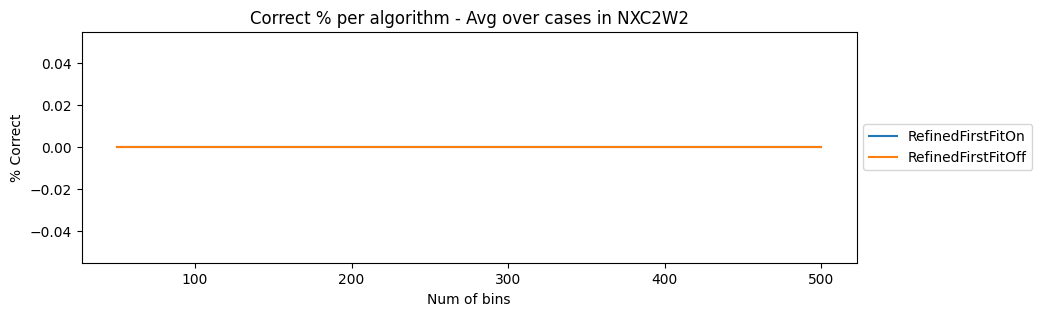

In [15]:
plt.figure(figsize=(10,3))

for i in correct_percentage_fifty:
    plt.plot([50,100,200,500],[correct_percentage_fifty[i],correct_percentage_hundred[i],correct_percentage_twohundred[i],correct_percentage_fivehundred[i]], label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('% Correct')
plt.title('Correct % per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

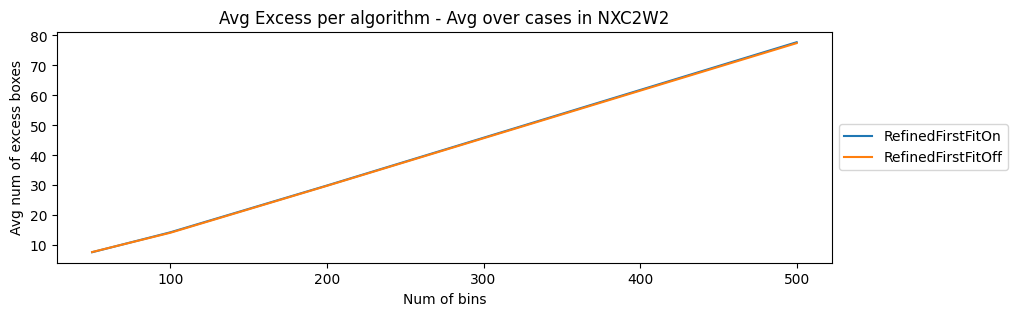

In [16]:
plt.figure(figsize=(10,3))

for i in correct_percentage_fifty:
    plt.plot([50,100,200,500],[avg_excess_fifty[i],avg_excess_hundred[i],avg_excess_twohundred[i],avg_excess_fivehundred[i]], label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('Avg num of excess boxes')
plt.title('Avg Excess per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

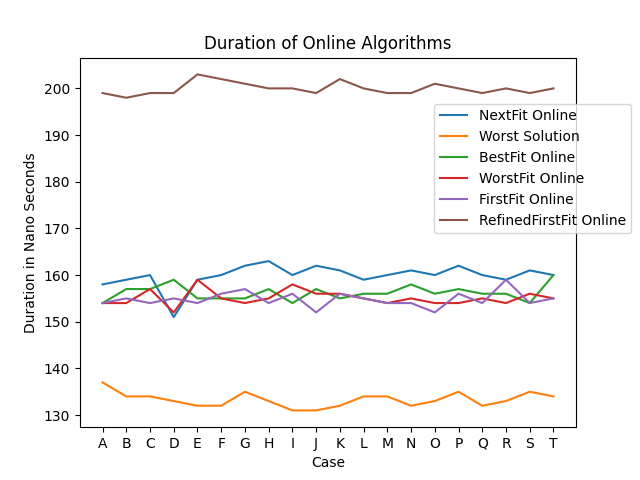

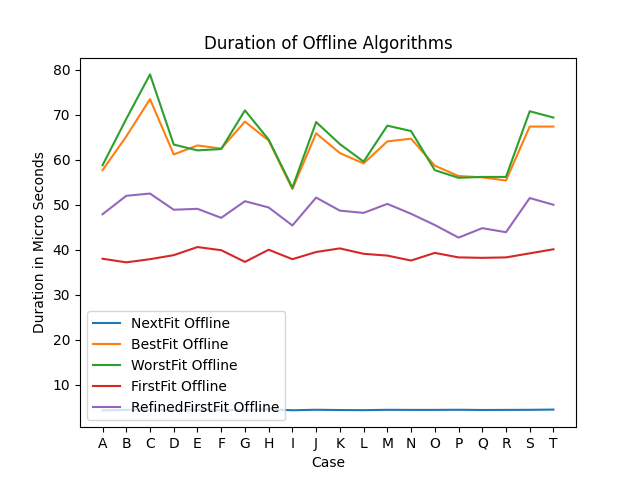

Note: Error bars omitted because they clutter the graph and make it too hard to read. To see error bars, go to ./analysis_tools/bench_grapher.py and uncomment the block comments containing "plt.errorbar(...

### Analysis of RFF
Refined first fit takes the longest amount of time out of any algorithm we have seen so far. Surpassing all other online algorithms by approximately at least 40 ns. This is probably due to it having to classify each item. It also used an excess amount of bins similar to nextfit. In general, we can conclude this algorithm is not an improvement in terms of accuracy compared to algorithms like bestfit.

## T5 - Multiway Number Partitioning

In this section, rather thn finding a minimal number of bins, we must divide the weights of the items over a fixed number boxes.

### What can we reuse?
Our KPIs from the last tasks (running time, % excess, avg excess) with the exception of runtime become inadequate to evaluate this version of the problem. Solutions of the MNP problem always have the same k amount of bins, so % excess and avg excess would always be 0. This doesn't mean all our old code was unusable however, some algorithms for MNP use binpacking algorithms alongside binary search to compute the result, the readers are still needed for retrieving input to the problem and the solution is still of the same format. So from inspection, we can conclude our algorithms and reader to still be useful.

In [17]:
from macpacking.reader import DatasetReader, BinppReader, JburkardtReader, SolutionReader
from macpacking.model import Online, Offline
from macpacking.multiway_adapter import MultiwayAdapter
import macpacking.algorithms.offline as offline
import macpacking.algorithms.online as online
import macpacking.algorithms.baseline as baseline

In [18]:
c_file = '_datasets/jburkardt/p04_c.txt'
w_file = '_datasets/jburkardt/p04_w.txt'
reader: DatasetReader = JburkardtReader(c_file, w_file) 
print(f'Capacity File: {c_file}')
print(f'Weights File: {w_file}')
print(f'  - Number of Bins: {MultiwayAdapter.to_multiway(reader.offline(),20)[0]}')
print(f'  - Objects to pack: {MultiwayAdapter.to_multiway(reader.offline(),20)[1]}')

Capacity File: _datasets/jburkardt/p04_c.txt
Weights File: _datasets/jburkardt/p04_w.txt
  - Number of Bins: 20
  - Objects to pack: [10, 252, 127, 106, 10, 127, 12, 252, 46, 127, 106, 127, 10, 106, 12, 37, 10, 252, 106, 84, 252, 85, 37, 252, 10, 252, 10, 9, 127, 12, 442, 252]


Using the binpacking library, we can import a baseline for the MultiwayNumberPartitioning problem.

In [19]:
strategy: Offline = baseline.MultiwayNumberPartitioning()
result = strategy(MultiwayAdapter.to_multiway(reader.offline(),9))
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(f'\nmax_bin_size = {min([sum(res) for res in result])}')

nb_bins = 9
[[127, 127, 85, 84], [252, 106, 12, 12, 10, 9], [252, 106, 37], [252, 106, 37], [252, 106, 46], [252, 127, 10, 10], [252, 127, 10, 10], [252, 127, 12, 10], [442]]

max_bin_size = 395


In [20]:
strategy: Online = online.EmptiestBinOn()
result = strategy(MultiwayAdapter.to_multiway(reader.online(),9))
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(f'\nmax_bin_size = {min([sum(res) for res in result])}')

nb_bins = 9
[[10, 106, 37, 37, 10, 252], [10, 127, 252], [12, 127, 85, 127], [46, 10, 106, 252], [106, 12, 10, 84, 10, 9, 12, 252], [127, 106, 442], [127, 252], [252], [252]]

max_bin_size = 252


In [21]:
strategy: Offline = offline.EmptiestBinOff()
result = strategy(MultiwayAdapter.to_multiway(reader.offline(),9))
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(f'\nmax_bin_size = {min([sum(res) for res in result])}')

nb_bins = 9
[[127, 127, 85, 84], [252, 106, 12, 12, 10, 9], [252, 106, 37], [252, 106, 37], [252, 106, 46], [252, 127, 10, 10], [252, 127, 10, 10], [252, 127, 12, 10], [442]]

max_bin_size = 395


In [22]:
strategy: Offline = offline.Multifit()
result = strategy(MultiwayAdapter.to_multiway(reader.offline(),9))
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(f'\nmax_bin_size = {min([sum(res) for res in result])}')

nb_bins = 9
[[106, 106, 85], [252, 106], [252, 106, 84], [252, 127], [252, 127, 10, 10, 10, 10, 9], [252, 127, 37, 10, 10], [252, 127, 37, 12, 12], [252, 127, 46, 12], [442]]

max_bin_size = 297


### Analyzing Our Algorithms 
To analyze our algorithm, we compare it with the BP libraries MultiwayNumberPartitioning method. We will analyze our algorithm's runtime and the maximum size of any of the bins. We believe this is an ideal KPI for this problem because if the max size of any bin is minimized, we are ensuring that every bin (server, box, container if this were a real life application) is bearing as little load as it can given a set of items. 

#### Runtime

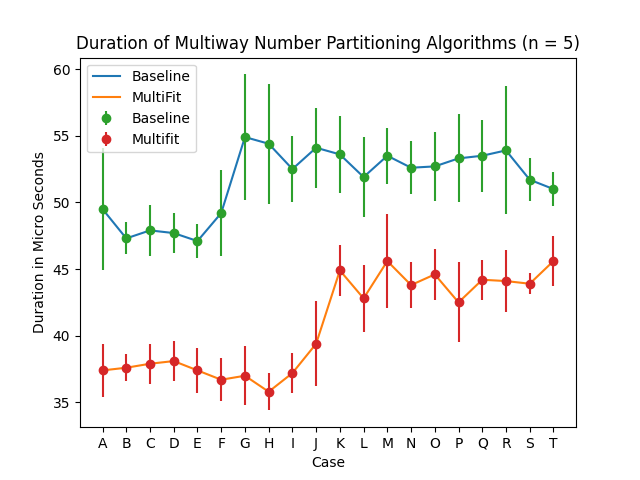

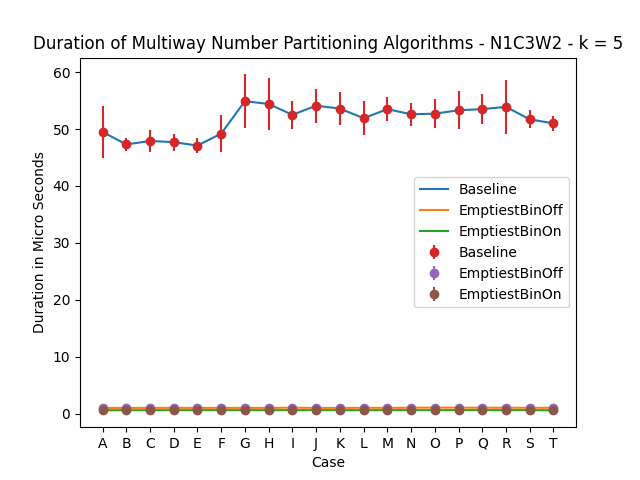

In the above image, we can see that our emptiestbin algorithm performs significantly faster than the baseline algorithm, however it is difficult to see how the online and offline versions of the algorithm compare to each other.

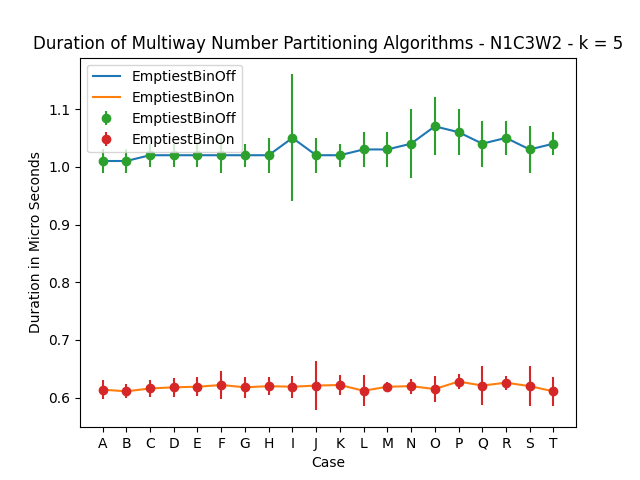

In the above graph, we compare the offline (decreasing) version of the algorithm to its online counterpart. We see that the offline version of the algorithm runs slower than its online counterpart. This observation makes sense since the offline version of the algorithm is the same as the online, but it sorts the data in descending order first, increasing the runtime.

#### Maximal/Minimal Bin Weight

Our next two KPIs are the maximal and minimal bin weight of the produced results. Maximal bin size is an important KPI because if you were trying ensure non of your bins (server, containers, etc) are taking on the least weight possible, you would use an algorithm which minimizes this KPI. The minimal bin size, if maximized ensures an even distribution amongst the lowest number of bins. Therefore, if a scenario has an flat cost per bin (server, container, etc), an algorithm which maximizes minimal bin weight would be ideal.

In [23]:
from analysis_tools.improvement_margin import(
    list_case_files,
    find_max_bin_size_fixed_k,
    find_min_bin_size_fixed_k,
    find_max_bin_size_var_k,
    find_min_bin_size_var_k
)

import macpacking.algorithms.baseline as baseline
from macpacking.reader import DatasetReader, BinppReader, SolutionReader
from macpacking.multiway_adapter import MultiwayAdapter

In [24]:
cases = list_case_files("./_datasets/binpp-hard")
case = "./_datasets/binpp-hard/HARD0.BPP.txt"
binCount = 80
lower = 75
upper = 85

ONLINE_STRATEGIES = [
    online.EmptiestBinOn
]
OFFLINE_STRATEGIES = [
    offline.EmptiestBinOff,
    baseline.MultiwayNumberPartitioning,
    offline.Multifit
]
# Compute minimal and maximal bin weights for variable and fixed (k)s
# Note, this takes a while to run
min_fixed = find_min_bin_size_fixed_k(cases, ONLINE_STRATEGIES+OFFLINE_STRATEGIES, binCount)
max_fixed = find_max_bin_size_fixed_k(cases, ONLINE_STRATEGIES+OFFLINE_STRATEGIES, binCount)
min_var = find_min_bin_size_var_k(case, ONLINE_STRATEGIES+OFFLINE_STRATEGIES, lower,upper)
max_var = find_max_bin_size_var_k(case, ONLINE_STRATEGIES+OFFLINE_STRATEGIES, lower,upper)


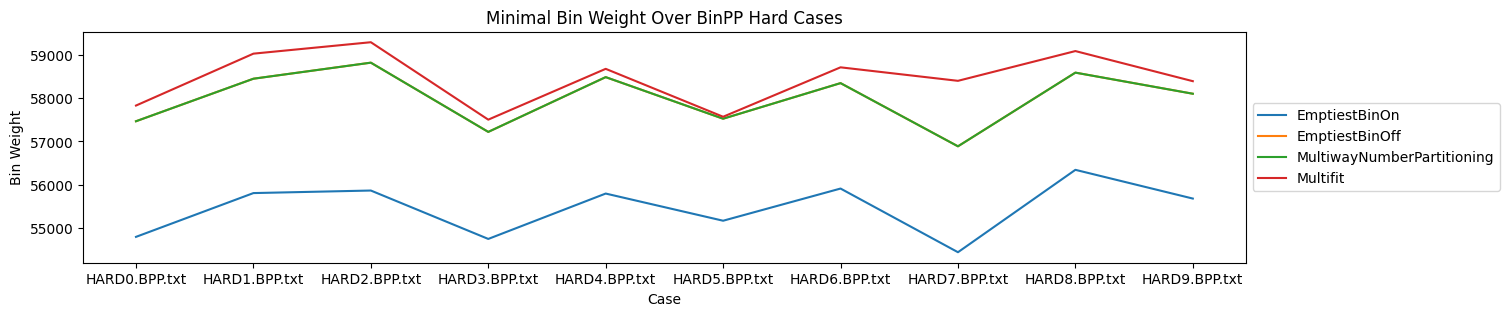

In [25]:
plt.figure(figsize=(15,3))

for i in min_fixed:
    plt.plot([j for j in min_fixed[i]], min_fixed[i].values(), label = i)

plt.xlabel('Case')
plt.ylabel('Bin Weight')
plt.title('Minimal Bin Weight Over BinPP Hard Cases')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

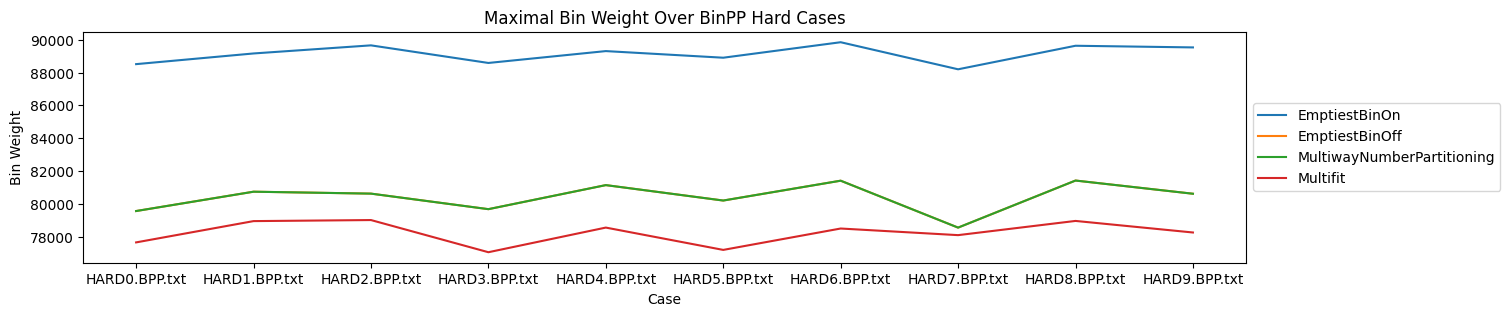

In [26]:
plt.figure(figsize=(15,3))

for i in max_fixed:
    plt.plot([j for j in max_fixed[i]], max_fixed[i].values(), label = i)

plt.xlabel('Case')
plt.ylabel('Bin Weight')
plt.title('Maximal Bin Weight Over BinPP Hard Cases')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

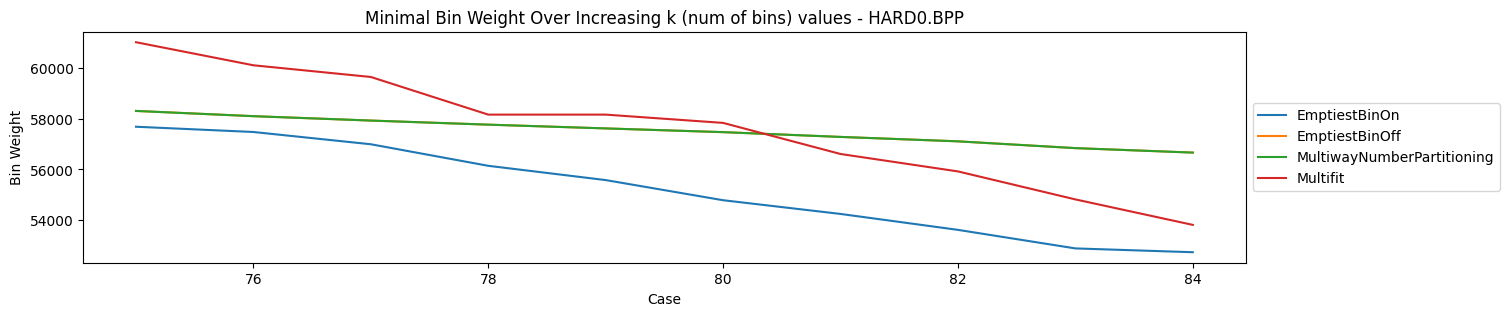

In [27]:
plt.figure(figsize=(15,3))

for i in min_var:
    plt.plot([j for j in min_var[i]], min_var[i].values(), label = i)

plt.xlabel('Case')
plt.ylabel('Bin Weight')
plt.title('Minimal Bin Weight Over Increasing k (num of bins) values - HARD0.BPP')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

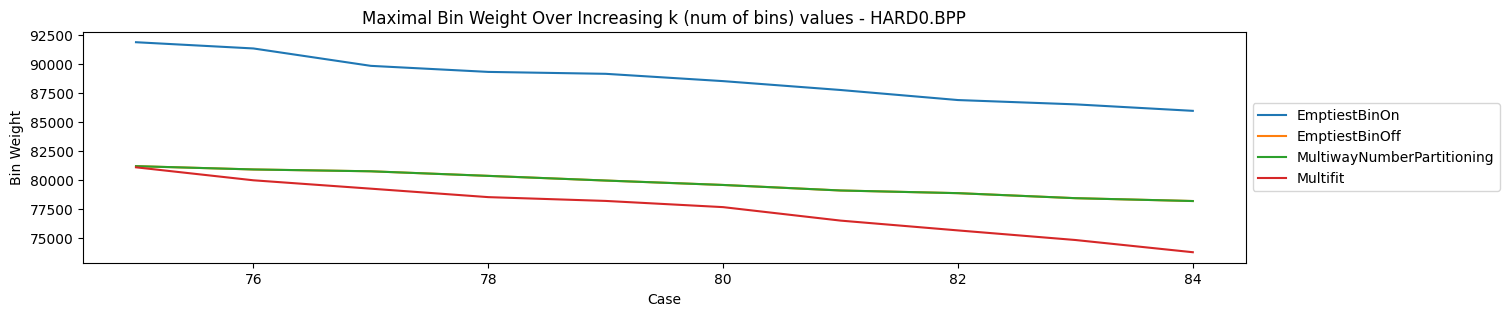

In [28]:
plt.figure(figsize=(15,3))

for i in max_var:
    plt.plot([j for j in max_var[i]], max_var[i].values(), label = i)

plt.xlabel('Case')
plt.ylabel('Bin Weight')
plt.title('Maximal Bin Weight Over Increasing k (num of bins) values - HARD0.BPP')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Analyzing The Results
Throughout all the results, EBOff and MultiwayNumberPartitioning (base) perform the exact same which is why one of them does not appear on the graph. 

#### Maximal Bin Weight
We observe that for a fixed and variable k value EBOn maintains the largest maximal bin value and Multifit the lowest. Therefore it can be concluded multifit minimizes the strain on any single bin when applied and that this strain decreases as we increase the number of bins. EBOff and the base MultiwayNumberPartitioning (base) perform worse than Multifit, but better than EBOn.

#### Minimal Bin Weight
For a low value of k, Multifit maximizes the minimal bin weight, but as k grows, it gets surpassed by base/EBOff. EBOn maintains the smallest minimal binweight in all cases and values of k

#### What does this mean?
For applications which you want to minimize the strain on a single bin (for whatever intepretation of bin you choose), it would be best to use the multifit algorithm to divide the weights amongst your bins. For applications in which you want to divide the load while also minimizing the number of bins used, Multifit performs best when you have a low number of bins available, but if you have a high number of bins, EBoff/base perform the best.


We observe that Multifit minimizes the Maximal bin weight throughout multiple test cases at a fixed K variable. Additionally, it maintains the lowest maximal weight at a single testcase with various values of b, but we see that its maximal binweight will rise above the base case and EBoff if we continue to decrease the value of K. For lowest
EmptiestBinOn (EBOn) performs the worst out all the algorithms, as it is the only online algorithm. It always has the height maximal bin weight for any case and value of k by a large margin and the smallest minimal bin value.

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

### Maged
#### Backward
#### Inward
#### Outward
#### Forward

### Jinal
#### Backward
#### Inward
#### Outward
#### Forward